# Competição Kaggle: Modelo regressão preços de casas

<img width="650" height="112" style="display: block; margin-left: auto; margin-right: auto" src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png">

Peça um comprador para descrever a casa dos sonhos e ele provavelmente não vai começar com o pé direito ou com a distância até uma avenida principal. Mas este dataset mostra que há muito mais a ser considerado do que somente o número de banheiros ou uma fachada bonita. 

O dataset é composto por 79 variáveis descrevendo praticamente todos os aspectos de resiencias em Ames (Iowa, EUA). O objetivo da competição é prever o preço final de cada casa.

A descrição completa dos dados pode ser encontrada [neste link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

## Setup

Vamos começar o projeto importando o pandas e lendo nossa base de dados (data). Também vale um ajuste nas configurações de exibição de DF (DataFrames) do pandas para possibilitar a visualização de todas as colunas do DF.

In [1]:
import pandas as pd

# Ler os dados
data_full = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Ajustar o pandas para exibir todas as colunas quando necessário
pd.set_option('display.max_columns', 500)
data_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
data_full.shape

(1460, 81)

In [3]:
data_full.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Removendo valores extremos (Outliers)

Nos temos um dataset relativamente pequeno, com apenas 1460 amostras e dois tipos de variáveis: **CATEGÓRICAS** e **NUMÉRICAS**. Cada uma deve receber um tratamento específico antes de iniciarmos o treinamento com o modelo. 

Antes de mais nada removeremos os [valores extremos](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm), que são aqueles que estão:

- Abaixo do primeiro quartil -3*iqr (intervalo do interquartil)
- Acima do terceiro quatil +3*iqr (intervalo do interquartil)

In [4]:
previous_len = len(data_full)

# Calcula primeiro e terceiro quartil
first_quartile = data_full['SalePrice'].describe()['25%']
third_quartile = data_full['SalePrice'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data_full[(data_full['SalePrice'] > (first_quartile - 3 * iqr)) &
            (data_full['SalePrice'] < (third_quartile + 3 * iqr))]

print(f'Removidos {previous_len - len(data)} OUTLIERS')

Removidos 12 OUTLIERS


### Separação dos dados

Agora podemos separar nossos dados entre dados de treino e dados de validação. 

Faremos isso numa proporção de 80% para treino e 20% pra validação.

In [5]:
# Separa os alvos (y) e os preditores (X)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1)

from sklearn.model_selection import train_test_split

# Usa train_test_split para dividir os dados de treino e de validação
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

Agora precisamos saber quais de nossas colunas são **CATEGÓRICAS** e quais são **NUMÉRICAS**, pois elas receberão tratamentos diferentes. 

As colunas categóricas passarão pelo OneHotEnconding, função que irá transformará cada valor categórico em uma nova coluna e preenchendo a mesma conforme a lógica da imagem a seguir

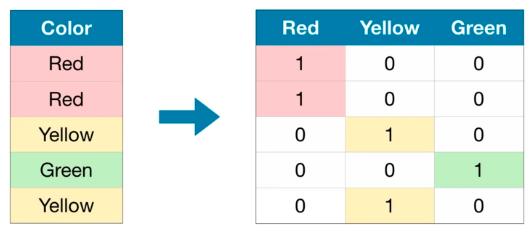

Sendo assim, para evitar um excesso de colunas, selecionaremos apenas aquelas com 10 ou menos categorias, descartando as que sobrarem. 

Para as colunas numéricas selecionaremos todas.

In [6]:
# Seleciona apenas as colunas categóricas com menos de 10 cantegorias 
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]    
                        
# Seleciona colunas numéricas
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]                                             

In [7]:
print(f'Total de colunas numéricas: {len(numerical_cols)}')
print(f'Total de colunas categóricas: {len(categorical_cols)}')

Total de colunas numéricas: 37
Total de colunas categóricas: 40


### Dados faltantes
É muito comum termos dados faltantes (missing data) nos datasets que trabalhamos. Entretanto, a maioria dos modelos de machine learning não trabalha bem com dados faltantes, sendo assim necessário retirá-los ou imputar-lhes algum valor. 

Vamos dar uma olhada no nosso dataset com a função missing_values_table encontrada no [StackOverflow](https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251)

In [8]:
# Função que imprime tabela com valores faltantes do dataset
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [9]:
missing_values_table(data)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1442,99.6
MiscFeature,1394,96.3
Alley,1357,93.7
Fence,1169,80.7
FireplaceQu,690,47.7
LotFrontage,258,17.8
GarageType,81,5.6
GarageYrBlt,81,5.6
GarageFinish,81,5.6
GarageQual,81,5.6


Pode-se notar que temos algumas colunas com vários valores faltantes. Vamos nos livrar apenas das colunas com mais de 50% de valores faltantes

In [10]:
# Seleciona conlunas com 50% ou mais de valores faltantes
NA_cols = [cname for cname in X_train_full.columns if X_train_full[cname].isnull().sum()/len(X_train_full)>=0.5]

# Remove as colunas
X_train_full.drop(NA_cols, axis=1, inplace=True)
X_valid_full.drop(NA_cols, axis=1, inplace=True)

# Removing NA_cols from categorical_cols and numerical_cols
categorical_cols = list(set(categorical_cols)-set(NA_cols))
numerical_cols = list(set(numerical_cols)-set(NA_cols))

In [11]:
# Mantém apenas as colunas selecionadas para os dados de treino
my_cols = categorical_cols + numerical_cols

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

# Test data
X_test = test[my_cols].copy()

## Linha de base
Antes de treinarmos nosso modelo, é importante estabelecermos uma linha de base (baseline), ou seja, um valor que servirá para indicar quanto nosso modelo está sendo eficiente no seu trabalho.

Tomaremos como linha de base a média dos valores de y e para medir a eficiência do modelo utilizaremos o erro mínimo absoluto importando a função mean_absolute_error (MAE) direto do scikit-learn

In [12]:
from sklearn.metrics import mean_absolute_error

array_mean = [y.mean()] * len(y)
baseline = round(mean_absolute_error(array_mean, y),2)

print(f'Valor do MAE para linha de base: {baseline}')

Valor do MAE para linha de base: 53947.08


## Pipeline

Agora que já fizemos um tratamento prévio nos nossos dados, podemos comçar a construir a nossa pipeline: uma série de processos que prepara os dados para serem utilizados pelo nosso modelo. Nessa pipeline teremos:

- SimpleImputer: vamos imputar valores para as colunas que ainda possuem valores faltantes. A estratégia utilizada aqui é a 'most_frequent', ou seja, substituiremos os valores faltantes pelos valores mais comuns dos dados de teste daquela coluna.

- OneHotEncoder: como mostrado previamente, vai servir para transformar as colunas categóricas em novas colunas com marcadores numéricos.

- MinMaxScaler: nossos dados serão reescalados para um intervalo de 0 a 1, o que deve facilitar o trabalho do nosso modelo.

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
                                        ('imputer',SimpleImputer(strategy='most_frequent')),
                                        ('minmax',MinMaxScaler(feature_range=(0, 1)))
                                        ])  

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
                                  ('imputer', SimpleImputer(strategy='most_frequent')),
                                  ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                        ])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



## Treino e Validação

Como estamos tentando prever dados numéricos contínuos, temos um problema para um algoritmo de regressão. Existem vários algoritmos que poderiam ser usados aqui, mas para este caso utilizaremos o XGBRegressor.

In [14]:
# imports

from xgboost import XGBRegressor

model = XGBRegressor()

model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

Podemos ver na célula acima que nosso modelo possui diversos hiperparâmetros e não temos como saber logo de cara quais os melhores para o nosso caso em específico. Para descobrir isso, utilizaremos o GridSearchCV, passando para ele os hiperparâmetros que queremos testar e ele fará a busca pelo melhor modelo.


### GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

# Hiperparâmetros a serem testados. o "M__" no início de cada nome se dá pela nomeação do nosso modelo como M na pipeline
params = {
        'M__learning_rate' : [.01,.03,.05],
        'M__n_estimators': [200, 500, 1000],
        'M__min_child_weight': [1, 5, 10],
        'M__gamma': [0.5, 1, 2, 5],
        'M__subsample': [0.6, 0.8, 1.0],
        'M__colsample_bytree': [0.6, 1.0],
        'M__max_depth': [3, 5]
        }


# Junta o preprocessamento e o modelo na pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('M', model)])

grid_search = GridSearchCV(estimator = my_pipeline, param_grid=params, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True, refit = True)



In [16]:
# Treinamento com o grid (essa parte demora bastante)
grid_search.fit(X_train, y_train)

grid_search.best_score_

[22:43:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-14873.35485275008

In [17]:
# Salvando o melhor modelo
best_model = grid_search.best_estimator_[1]
best_model

XGBRegressor(colsample_bytree=0.6, gamma=0.5, learning_rate=0.03,
             min_child_weight=5, n_estimators=1000, subsample=0.6)

### Treinando com o melhor modelo

Após encontrarmos nosso modelo vencedor podemos treino


In [18]:
# Junta o preprocessamento e o modelo na pipeline, agora com o modelo vencedor
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', best_model)])

# Treinando o modelo
my_pipeline.fit(X_train, y_train)

# Previsão do modelo para os dados de validação
preds = my_pipeline.predict(X_valid)

mae_valid = round(mean_absolute_error(preds, y_valid),2)

print(f'MAE validação: {mae_valid}')


[22:43:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE validação: 14873.85


Podemos agora comparar o MAE da nossa baseline com o MAE de validação comprovando a eficiencia do nosso modelo

In [19]:
print(f'MAE validação: {mae_valid}')
print(f'MAE da baseline: {baseline}')

dif = round((mae_valid - baseline)/baseline*100,2)
print(f'Redução do erro: {dif}%')

MAE validação: 14873.85
MAE da baseline: 53947.08
Redução do erro: -72.43%


## Teste e submissão

Como essa base da dados faz parte de uma competição do Kaggle, ainda temos que fazer a previsão com os dados de teste para fazer a submissão.

In [20]:
# Resultados
results = my_pipeline.predict(X_test)

# Formatando a submissão conforme o padrão do Kaggle
submission = pd.DataFrame(data={'Id':[i for i in range(len(data_full)+1,len(data_full)+len(test)+1)], 'SalePrice':results})

# Exportando em csv
submission.to_csv('submission.csv', index=False)


Podemos também salvar a pipeline com o modelo para usar posteriormente se necessário:

In [21]:
from joblib import dump
dump(my_pipeline, 'pipeline.joblib') 

['pipeline.joblib']